## Install necessary libraries

In [4]:
#!pip install scikit-learn


##  Import libraries

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [6]:
df = pd.read_csv('data/bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [8]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6637,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6638,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6639,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [9]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6636    4.337242
6637    4.416688
6638    5.767004
6639    5.000000
6640    5.000000
Name: pIC50, Length: 6641, dtype: float64

### **3.3. Let's examine the data dimension**

In [10]:
X.shape

(6641, 881)

In [11]:
Y.shape

(6641,)

### **3.4. Remove low variance features**

In [12]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [13]:
X.shape

(6641, 144)

## **4. Data split (80/20 ratio)**

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
X_train.shape, Y_train.shape

((5312, 144), (5312,))

In [16]:
X_test.shape, Y_test.shape

((1329, 144), (1329,))

## **5. Building a Regression Model using Random Forest**

In [17]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6955975347157084

In [18]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

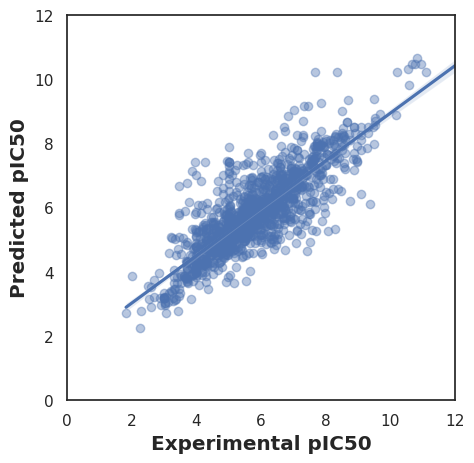

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)

plt.show()